In [1]:
from pymatgen.matproj.rest import MPRester
import os
from pymatgen.core.periodic_table import Element

In [2]:
with MPRester(os.environ['MAPI_KEY']) as m:
    results = []
    for A in ["K","Rb","Cs"]:
        for B in ["Si","Ge","Sn","Pb","Ni","Pd","Pt","Se","Te"]:
            for X in ["Cl","Br","I"]:
                #print(A+"2"+B+X+"6")
                result = m.query(criteria={"pretty_formula": A+"2"+B+X+"6"}, properties=["pretty_formula", 
                                                                                         "spacegroup.symbol",
                                                                                         "nsites",
                                                                                         "icsd_id",
                                                                                         "e_above_hull",
                                                                                         "band_gap",
                                                                                         "task_id"
                                                                                        ])
                if len(result)!=0:
                    for i in result:
                        results.append(i)

In [3]:
def convert_formula_latex(pretty_formula):
    import re
    m = re.match("([A-Za-z]+)([0-9])([A-Za-z]+)([A-Za-z]+)([0-9])", pretty_formula)
    if m:
        return m.group(1) + "$_" + m.group(2) + "$" + \
            m.group(3) + m.group(4) + "$_" + m.group(5) + "$"

    

In [4]:
import collections

data = collections.defaultdict(list)
for e in results:
    if e["icsd_id"] != None:
        data["Formula"].append(convert_formula_latex(e["pretty_formula"]))
        #data["Materials ID"].append(e["task_id"])
        data["ICSD ID"].append(str(e["icsd_id"]))
        if e["spacegroup.symbol"] == 'Fm-3m':
            data["Space group"].append(r'Fm$\bar{3}$m')
            data["Crystal system"].append("Cubic")
        elif e["spacegroup.symbol"] in ['P4/mnc', 'I4/m', 'I4/mmm']:
            data["Space group"].append(e["spacegroup.symbol"]) 
            data["Crystal system"].append("Tetragonal")
        elif e["spacegroup.symbol"] == 'P2_1/c':
            data["Space group"].append(r'P2$_{1}$/c')
            data["Crystal system"].append("Monoclinic")
        elif e["spacegroup.symbol"] == 'Pnma':
            data["Space group"].append(e["spacegroup.symbol"]) 
            data["Crystal system"].append("Orthorhombic")
            
        data["Nsites"].append(e["nsites"]) 
        data["Ehull"].append(e["e_above_hull"]) 
        #data["Bandgap"].append(e["band_gap"]) 

from pandas import DataFrame
import pandas as pd
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    
df = DataFrame(data, columns=["Formula", "ICSD ID", "Space group", "Crystal system", "Nsites", "Ehull"])
df

,Formula,ICSD ID,Space group,Crystal system,Nsites,Ehull
0,K$_2$SnCl$_6$,6058,Fm$\bar{3}$m,Cubic,9,0.007380
1,K$_2$SnBr$_6$,30212,P4/mnc,Tetragonal,18,0.004630
2,K$_2$SnBr$_6$,35557,P2$_{1}$/c,Monoclinic,18,0.000000
3,K$_2$SnBr$_6$,158955,Fm$\bar{3}$m,Cubic,9,0.014178
4,K$_2$PdCl$_6$,33709,Fm$\bar{3}$m,Cubic,9,0.000000
5,K$_2$PtCl$_6$,31114,Fm$\bar{3}$m,Cubic,9,0.000000
6,K$_2$PtBr$_6$,23771,Fm$\bar{3}$m,Cubic,9,0.000000
7,K$_2$PtI$_6$,37190,P4/mnc,Tetragonal,18,0.000000
8,K$_2$SeBr$_6$,36228,Fm$\bar{3}$m,Cubic,9,0.000000
9,K$_2$TeBr$_6$,37270,P4/mnc,Tetragonal,18,0.012528


In [5]:
print(df.to_latex(escape = False, index=False))

\begin{tabular}{llllrr}
\toprule
        Formula & ICSD ID &   Space group & Crystal system &  Nsites &     Ehull \\
\midrule
  K$_2$SnCl$_6$ &    6058 &  Fm$\bar{3}$m &          Cubic &       9 &  0.007380 \\
  K$_2$SnBr$_6$ &   30212 &        P4/mnc &     Tetragonal &      18 &  0.004630 \\
  K$_2$SnBr$_6$ &   35557 &    P2$_{1}$/c &     Monoclinic &      18 &  0.000000 \\
  K$_2$SnBr$_6$ &  158955 &  Fm$\bar{3}$m &          Cubic &       9 &  0.014178 \\
  K$_2$PdCl$_6$ &   33709 &  Fm$\bar{3}$m &          Cubic &       9 &  0.000000 \\
  K$_2$PtCl$_6$ &   31114 &  Fm$\bar{3}$m &          Cubic &       9 &  0.000000 \\
  K$_2$PtBr$_6$ &   23771 &  Fm$\bar{3}$m &          Cubic &       9 &  0.000000 \\
   K$_2$PtI$_6$ &   37190 &        P4/mnc &     Tetragonal &      18 &  0.000000 \\
  K$_2$SeBr$_6$ &   36228 &  Fm$\bar{3}$m &          Cubic &       9 &  0.000000 \\
  K$_2$TeBr$_6$ &   37270 &        P4/mnc &     Tetragonal &      18 &  0.012528 \\
  K$_2$TeBr$_6$ &   65115 &    P2$

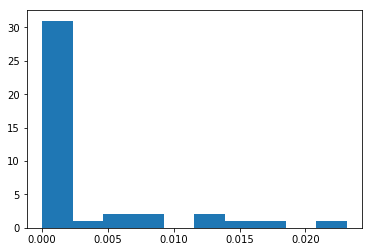

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(df["Ehull"])
plt.show()

In [13]:
with open('/Users/yao/Google Drive/data/216/exp_structure.csv','w') as f:
    f.write('Compound, Spacegroup\n')
    for e in results:
        f.write(e['pretty_formula'])
        f.write(',')
        f.write(e['spacegroup.symbol'])
        f.write('\n')